In [402]:
import warnings
from os import listdir
from os.path import basename, splitext
from itertools import permutations
from multiprocessing import Pool

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame, Timedelta, read_hdf 
from matplotlib import pyplot as plt
from matplotlib import cm 

In [68]:
# Settings
warnings.filterwarnings("ignore")
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (20, 8)  # Размер картинок

%matplotlib inline

In [3]:
def downsample(dataframe):
    return dataframe.resample('60Min').last()

In [4]:
def to_dataframe(hdf):
    return DataFrame(read_hdf(f"data/hdf/{hdf}"))

In [5]:
def tickername(file):
    return splitext(basename(file))[0]

In [6]:
def load(hdf):
    # split ticker to base-quoted
    ticker = tickername(hdf)
    dataframe = to_dataframe(hdf)
    dataframe.columns = [ticker]
    return downsample(dataframe)

In [7]:
# Check data
ethbtc = load('ethbtc.hdf')
ethbtc.head(5)

,ethbtc
Date_Time,
2017-07-14 07:00:00,0.086347
2017-07-14 08:00:00,0.085399
2017-07-14 09:00:00,0.087200
2017-07-14 10:00:00,0.088591
2017-07-14 11:00:00,0.088888


In [8]:
ethbtc.count()

ethbtc    9368
dtype: int64

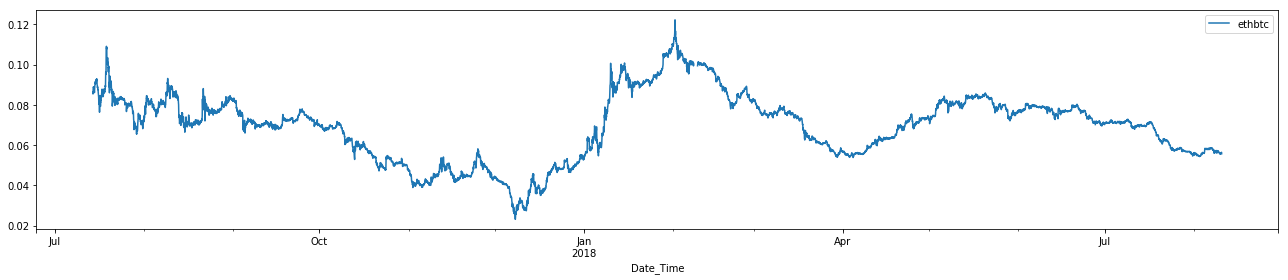

In [9]:
ethbtc.plot(figsize=(18,4))

In [10]:
def get_hdf_files():
    return listdir('data/hdf/')

In [207]:
hdf_files = get_hdf_files()
hdf_files.remove('ethbtc.hdf')
hdf_files

['xrpbtc.hdf',
 'qtumbnb.hdf',
 'omgbtc.hdf',
 'xrpeth.hdf',
 'zeceth.hdf',
 'zrxbtc.hdf',
 'qtumeth.hdf',
 'etcbtc.hdf',
 'xrpbnb.hdf',
 'qtumbtc.hdf',
 'neousdt.hdf',
 'xlmeth.hdf',
 'etcbnb.hdf',
 'zecbtc.hdf',
 'etceth.hdf',
 'omgeth.hdf',
 'xrpusdt.hdf',
 'ethusdt.hdf',
 'qtumusdt.hdf',
 'neobnb.hdf',
 'xlmusdt.hdf',
 'bnbusdt.hdf',
 'dasheth.hdf',
 'ltceth.hdf',
 'bnbbtc.hdf',
 'btcusdt.hdf',
 'adausdt.hdf',
 'bnbeth.hdf',
 'neobtc.hdf',
 'adabnb.hdf',
 'xmrbtc.hdf',
 'neoeth.hdf',
 'adaeth.hdf',
 'xmreth.hdf',
 'ltcusdt.hdf',
 'xlmbnb.hdf',
 'adabtc.hdf',
 'ltcbnb.hdf',
 'etcusdt.hdf',
 'zrxeth.hdf',
 'xlmbtc.hdf',
 'ltcbtc.hdf',
 'dashbtc.hdf']

In [208]:
def add(base, tickers): 
    for ticker in tickers:
        base = base.join(ticker)
        base.dropna(inplace=True)
    return base 

In [209]:
tickers = Pool().map(load, hdf_files)
result_dataframe = add(ethbtc, tickers)
result_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,xmreth,ltcusdt,xlmbnb,adabtc,ltcbnb,etcusdt,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,0.077528,0.000086,0.77842,0.001427,0.001110,0.38827,0.000150,0.022680,0.002262,0.03823,...,0.25562,106.56,0.01615,0.000026,6.91,15.5300,0.001937,0.000036,0.015566,0.038798
2018-06-12 06:00:00,0.077175,0.000086,0.77324,0.001413,0.001110,0.38968,0.000149,0.022889,0.002242,0.03720,...,0.25553,105.00,0.01588,0.000026,6.75,15.2300,0.001940,0.000036,0.015446,0.039055
2018-06-12 07:00:00,0.077697,0.000086,0.76153,0.001405,0.001104,0.38883,0.000150,0.022943,0.002296,0.03678,...,0.25376,106.35,0.01564,0.000026,6.69,15.6002,0.001932,0.000036,0.015618,0.038967


In [210]:
def ration(df):
    for ticker in df.columns:
        df[ticker] = StandardScaler().fit_transform(
            df[ticker].values.reshape(-1, 1))
    return df 

In [230]:
# Cut 50% of matrix and drop labels on stages
ration_dataframe = ration(result_dataframe)
ration_dataframe.head(3)

,ethbtc,xrpbtc,qtumbnb,omgbtc,xrpeth,zeceth,zrxbtc,qtumeth,etcbtc,xrpbnb,...,xmreth,ltcusdt,xlmbnb,adabtc,ltcbnb,etcusdt,zrxeth,xlmbtc,ltcbtc,dashbtc
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,1.315797,1.804590,2.380457,1.534198,2.173736,-0.407647,0.773333,2.475940,-0.481585,1.754833,...,-1.203284,2.763782,-0.283944,1.930592,1.785112,-0.515348,-0.377464,0.739400,2.112015,0.971302
2018-06-12 06:00:00,1.270867,1.749543,2.312375,1.472052,2.173736,-0.372779,0.727885,2.587676,-0.570369,1.351413,...,-1.207897,2.580296,-0.356667,1.787722,1.472555,-0.754700,-0.370322,0.712635,2.036895,1.032930
2018-06-12 07:00:00,1.337308,1.767200,2.158466,1.436539,2.026716,-0.393799,0.797572,2.616545,-0.330653,1.186912,...,-1.298638,2.739082,-0.421310,1.823440,1.355346,-0.459340,-0.391801,0.719326,2.144567,1.011828


In [291]:
def weigh_quoted(ticker):
    weigh = 1000
    for idx, quoted in enumerate(['usdt', 'btc', 'eth', 'bnb']):
        if ticker.find(quoted) in [-1, 0]:
            continue
        return = idx * weigh

In [299]:
def weigh_base(ticker):
    # TODO: Sort by coinmarcetcup top
    bases = [
        'btc', 'xrp', 'eth', 'xlm', 'ltc', 'usdt', 'ada', 
        'xmr', 'dash', 'bnb', 'neo', 'etc', 'zec', 'mkr', 
        'doge', 'zrx', 'omg', 'dcr', 'qtum']
    for idx, base in enumerate(bases):
        if ticker.find(base) != 0:
            continue
        return idx

In [300]:
def weigh_ticker(ticker):
    return weigh_quoted(ticker) + weigh_base(ticker)

In [301]:
def sort_tickers(df):
    tickers = list(df.columns)
    sorted_tickers = sorted(tickers, key=weigh_ticker)
    return df[sorted_tickers]

In [302]:
ration_dataframe = sort_tickers(ration_dataframe)

In [303]:
corr = ration_dataframe.corr()
corr.head()

,btcusdt,xrpusdt,ethusdt,xlmusdt,ltcusdt,adausdt,bnbusdt,neousdt,etcusdt,qtumusdt,...,zrxeth,omgeth,qtumeth,xrpbnb,xlmbnb,ltcbnb,adabnb,neobnb,etcbnb,qtumbnb
btcusdt,1.000000,-0.111304,0.084317,0.947150,0.096739,0.552555,-0.251595,-0.004631,0.370594,-0.244190,...,0.738157,-0.448561,-0.454580,0.175701,0.887675,0.410161,0.638003,0.174041,0.370885,-0.124924
xrpusdt,-0.111304,1.000000,0.916427,-0.004257,0.952523,0.604403,0.703874,0.876350,-0.203442,0.949448,...,-0.464280,0.829192,0.842619,0.451740,-0.275575,0.389550,0.077685,0.444162,-0.562312,0.746826
ethusdt,0.084317,0.916427,1.000000,0.174181,0.939979,0.751219,0.585662,0.913881,0.019907,0.891642,...,-0.293648,0.732060,0.693566,0.499967,-0.072933,0.515780,0.286127,0.572613,-0.350058,0.765639
xlmusdt,0.947150,-0.004257,0.174181,1.000000,0.215557,0.687320,-0.194847,0.073969,0.247876,-0.129062,...,0.725874,-0.339084,-0.342343,0.247095,0.916824,0.493099,0.722983,0.219205,0.274442,-0.016479
ltcusdt,0.096739,0.952523,0.939979,0.215557,1.000000,0.762047,0.645304,0.867875,-0.174721,0.917265,...,-0.293698,0.738747,0.763685,0.462364,-0.063404,0.513415,0.253489,0.473944,-0.498337,0.742754


In [430]:
def plot_corr(corr, colormap='RdYlGn', size=10):
    count = len(corr.columns)
    ticks = range(count)
    labels = list(corr.columns)
    
    cmap = cm.get_cmap(colormap, 256)
    fig, ax = plt.subplots(figsize=(size, size))
    fig.suptitle('Сorrelation Matrix Plot', fontsize=20)

    
    ax.matshow(corr)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.xticks(ticks, labels, rotation='vertical')
    plt.yticks(ticks, labels)
    
    colorbar = fig.colorbar(cax, ticks=[1, 0, -1])

Colormaps reference
https://matplotlib.org/examples/color/colormaps_reference.html 

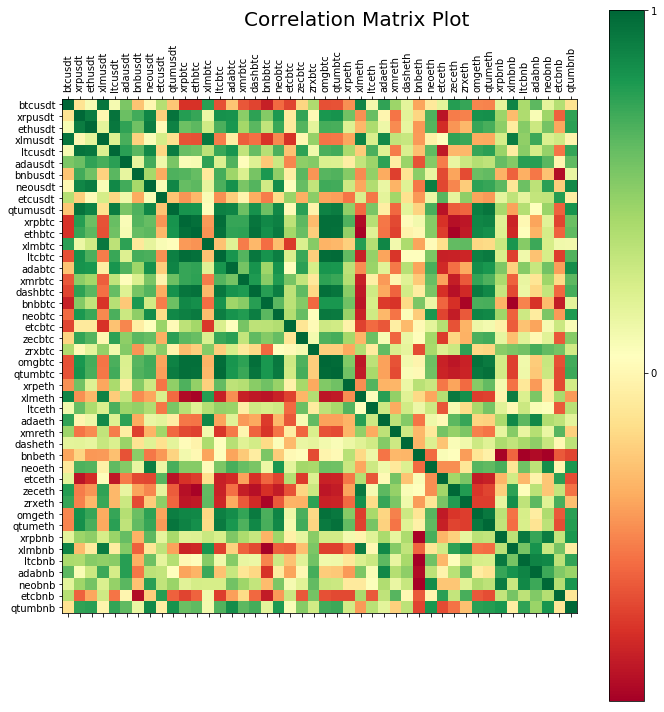

In [333]:
# plot_corr(corr, colormap='seismic') # - красно-синяя
# plot_corr(corr, colormap='Purples') # - однотонная
plot_corr(corr) # - зелено-желто-красная default

In [455]:
ration_dataframe.head(2)

,btcusdt,xrpusdt,ethusdt,xlmusdt,ltcusdt,adausdt,bnbusdt,neousdt,etcusdt,qtumusdt,...,zrxeth,omgeth,qtumeth,xrpbnb,xlmbnb,ltcbnb,adabnb,neobnb,etcbnb,qtumbnb
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-06-12 05:00:00,-0.019963,2.718039,1.992284,0.349602,2.763782,1.662935,1.228137,2.555260,-0.515348,2.656820,...,-0.377464,1.503589,2.475940,1.754833,-0.283944,1.785112,0.498880,1.641618,-1.184564,2.380457
2018-06-12 06:00:00,-0.081576,2.526439,1.805646,0.248277,2.580296,1.455246,1.306203,2.380852,-0.754700,2.615451,...,-0.370322,1.466542,2.587676,1.351413,-0.356667,1.472555,0.307013,1.435892,-1.248065,2.312375


In [456]:
ration_dataframe.corr().head(2)

,btcusdt,xrpusdt,ethusdt,xlmusdt,ltcusdt,adausdt,bnbusdt,neousdt,etcusdt,qtumusdt,...,zrxeth,omgeth,qtumeth,xrpbnb,xlmbnb,ltcbnb,adabnb,neobnb,etcbnb,qtumbnb
btcusdt,1.000000,-0.111304,0.084317,0.947150,0.096739,0.552555,-0.251595,-0.004631,0.370594,-0.244190,...,0.738157,-0.448561,-0.454580,0.175701,0.887675,0.410161,0.638003,0.174041,0.370885,-0.124924
xrpusdt,-0.111304,1.000000,0.916427,-0.004257,0.952523,0.604403,0.703874,0.876350,-0.203442,0.949448,...,-0.464280,0.829192,0.842619,0.451740,-0.275575,0.389550,0.077685,0.444162,-0.562312,0.746826


In [459]:
ration_dataframe.rolling('7D').corr().head(200)

btcusdt   xrpusdt   ethusdt   xlmusdt  \
Date_Time                                                              
2018-06-12 05:00:00 btcusdt        NaN       NaN       NaN       NaN   
                    xrpusdt        NaN       NaN       NaN       NaN   
                    ethusdt        NaN       NaN       NaN       NaN   
                    xlmusdt        NaN       NaN       NaN       NaN   
                    ltcusdt        NaN       NaN       NaN       NaN   
                    adausdt        NaN       NaN       NaN       NaN   
                    bnbusdt        NaN       NaN       NaN       NaN   
                    neousdt        NaN       NaN       NaN       NaN   
                    etcusdt        NaN       NaN       NaN       NaN   
                    qtumusdt       NaN       NaN       NaN       NaN   
                    xrpbtc         NaN       NaN       NaN       NaN   
                    ethbtc         NaN       NaN       NaN       NaN   
                    xlmbtc         NaN       NaN       NaN       NaN   
                    ltcbtc         NaN       NaN       NaN       NaN   
                    adabtc         NaN       NaN       NaN       NaN   
                    xmrbtc         NaN       NaN       NaN       NaN   
                    dashbtc        NaN       NaN       NaN       NaN   
                    bnbbtc         NaN       NaN       NaN       NaN   
                    neobtc         NaN       NaN       NaN       NaN   
                    etcbtc         NaN       NaN       NaN       NaN   
                    zecbtc         NaN       NaN       NaN       NaN   
                    zrxbtc         NaN       NaN       NaN       NaN   
                    omgbtc         NaN       NaN       NaN       NaN   
                    qtumbtc        NaN       NaN       NaN       NaN   
                    xrpeth         NaN       NaN       NaN       NaN   
                    xlmeth         NaN       NaN       NaN       NaN   
                    ltceth         NaN       NaN       NaN       NaN   
                    adaeth         NaN       NaN       NaN       NaN   
                    xmreth         NaN       NaN       NaN       NaN   
                    dasheth        NaN       NaN       NaN       NaN   
...                                ...       ...       ...       ...   
2018-06-12 08:00:00 xlmbnb    0.775479  0.570277  0.275403  0.715001   
                    ltcbnb    0.910296  0.754895  0.514402  0.871096   
                    adabnb    0.880781  0.732635  0.433531  0.811797   
                    neobnb    0.665524  0.426854  0.140285  0.610554   
                    etcbnb    0.414481  0.635119  0.563971  0.356655   
                    qtumbnb   0.695646  0.705887  0.362772  0.566709   
2018-06-12 09:00:00 btcusdt   1.000000  0.959113  0.814446  0.983405   
                    xrpusdt   0.959113  1.000000  0.903978  0.947511   
                    ethusdt   0.814446  0.903978  1.000000  0.855873   
                    xlmusdt   0.983405  0.947511  0.855873  1.000000   
                    ltcusdt   0.662108  0.812732  0.969182  0.709772   
                    adausdt   0.907304  0.927374  0.808699  0.937100   
                    bnbusdt  -0.319678 -0.126012  0.240181 -0.282781   
                    neousdt   0.710060  0.521969  0.430779  0.765692   
                    etcusdt   0.370283  0.616648  0.666458  0.369013   
                    qtumusdt  0.203507  0.469819  0.541926  0.192710   
                    xrpbtc    0.869445  0.972871  0.917871  0.854436   
                    ethbtc    0.373820  0.560385  0.830238  0.424152   
                    xlmbtc    0.960386  0.919627  0.886672  0.975562   
                    ltcbtc    0.366538  0.563904  0.834113  0.449946   
                    adabtc    0.858237  0.897148  0.757634  0.884525   
                    xmrbtc    0.356130  0.327439  0.335544  0.252048   
                    dashbtc  -0.029516  0.053213  0.169498 -0.124700   

In [398]:
indexes = ration_dataframe.index
start_date = indexes[0]
end_date = indexes[-1]
start_date, end_date

(Timestamp('2018-06-12 05:00:00'), Timestamp('2018-08-10 15:00:00'))

In [419]:
end_date - start_date

Timedelta('59 days 10:00:00')

In [443]:
rolling_period = Timedelta('7 days')
rolling_dataframes = []

counter = start_date
while counter <= end_date:
    counter += rolling_period
    timedelta = counter - start_date
    window = f"{timedelta.days}D"
    
    rolling_dataframe = ration_dataframe.rolling(window)
    rolling_dataframes.append(rolling_dataframe)
    
rolling_dataframes

[Rolling [window=604800000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=1209600000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=1814400000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=2419200000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=3024000000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=3628800000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=4233600000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=4838400000000000,min_periods=1,center=False,win_type=freq,axis=0],
 Rolling [window=5443200000000000,min_periods=1,center=False,win_type=freq,axis=0]]

In [444]:
len(rolling_dataframes)

9

In [445]:
rolling_dataframes[0].corr().head()

btcusdt  xrpusdt  ethusdt  xlmusdt  ltcusdt  \
Date_Time                                                                  
2018-06-12 05:00:00 btcusdt      NaN      NaN      NaN      NaN      NaN   
                    xrpusdt      NaN      NaN      NaN      NaN      NaN   
                    ethusdt      NaN      NaN      NaN      NaN      NaN   
                    xlmusdt      NaN      NaN      NaN      NaN      NaN   
                    ltcusdt      NaN      NaN      NaN      NaN      NaN   

                             adausdt  bnbusdt  neousdt  etcusdt  qtumusdt  \
Date_Time                                                                   
2018-06-12 05:00:00 btcusdt      NaN      NaN      NaN      NaN       NaN   
                    xrpusdt      NaN      NaN      NaN      NaN       NaN   
                    ethusdt      NaN      NaN      NaN      NaN       NaN   
                    xlmusdt      NaN      NaN      NaN      NaN       NaN   
                    ltcusdt      NaN      NaN      NaN      NaN       NaN   

                              ...     zrxeth  omgeth  qtumeth  xrpbnb  xlmbnb  \
Date_Time                     ...                                               
2018-06-12 05:00:00 btcusdt   ...        NaN     NaN      NaN     NaN     NaN   
                    xrpusdt   ...        NaN     NaN      NaN     NaN     NaN   
                    ethusdt   ...        NaN     NaN      NaN     NaN     NaN   
                    xlmusdt   ...        NaN     NaN      NaN     NaN     NaN   
                    ltcusdt   ...        NaN     NaN      NaN     NaN     NaN   

                             ltcbnb  adabnb  neobnb  etcbnb  qtumbnb  
Date_Time                                                             
2018-06-12 05:00:00 btcusdt     NaN     NaN     NaN     NaN      NaN  
                    xrpusdt     NaN     NaN     NaN     NaN      NaN  
                    ethusdt     NaN     NaN     NaN     NaN      NaN  
                    xlmusdt     NaN     NaN     NaN     NaN      NaN  
                    ltcusdt     NaN     NaN     NaN     NaN      NaN  

[5 rows x 44 columns]

In [428]:
rolling_corrs = []

for rolling_dataframe in rolling_dataframes:
    rolling_corrs.append(rolling_dataframe.corr())

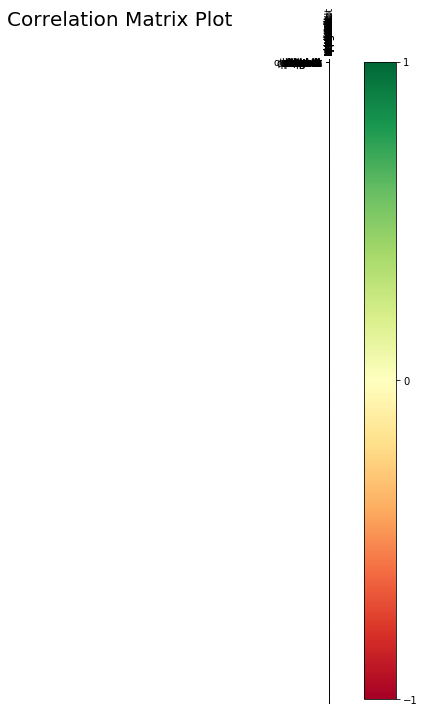

In [432]:
plot_corr(rolling_corrs[0])